# WeatherPy

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belozersk
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | malvan
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | kone
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | kill devil hills
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | petlad
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | leninskoye
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | izhevsk
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belozersk,60.0326,37.7957,11.66,72,93,3.13,RU,1718064685
1,kodiak,57.7900,-152.4072,7.73,100,100,7.20,US,1718064589
2,malvan,16.0667,73.4667,26.32,85,100,1.19,IN,1718064687
3,saipan,15.1355,145.7010,30.39,79,75,5.66,MP,1718064688
4,kone,-21.0595,164.8658,25.65,67,47,3.61,NC,1718064688


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belozersk,60.0326,37.7957,11.66,72,93,3.13,RU,1718064685
1,kodiak,57.7900,-152.4072,7.73,100,100,7.20,US,1718064589
2,malvan,16.0667,73.4667,26.32,85,100,1.19,IN,1718064687
3,saipan,15.1355,145.7010,30.39,79,75,5.66,MP,1718064688
4,kone,-21.0595,164.8658,25.65,67,47,3.61,NC,1718064688


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

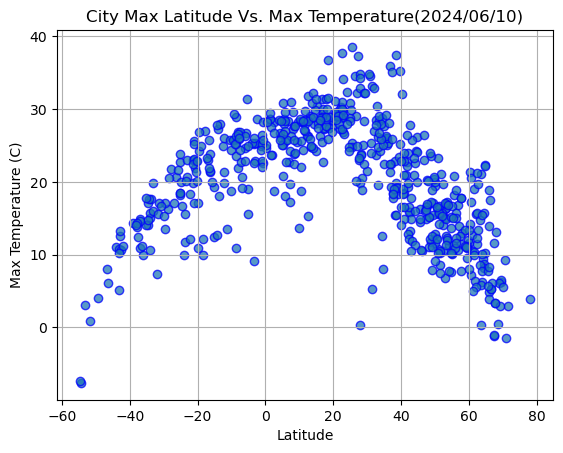

In [12]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(latitude, max_temp, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Max Temperature(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

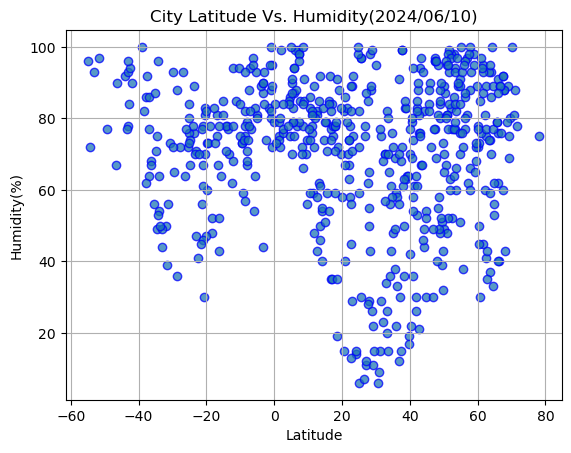

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

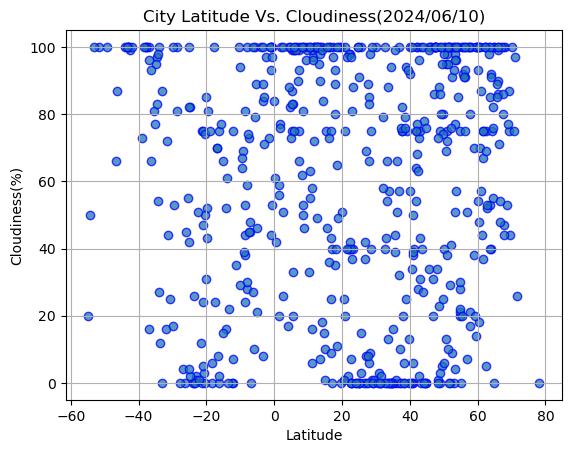

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

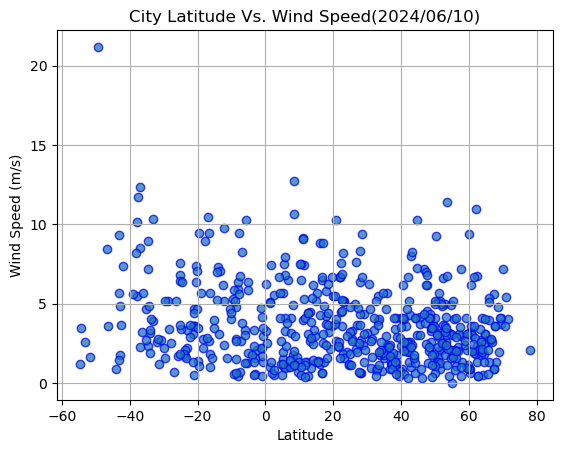

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_val, y_val, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    regression_values = x_val * slope + intercept
    line_eqn = f" y = {slope: .2f} x  + {intercept: .2f})"

    plt.scatter(x_val,y_val, edgecolors="blue", alpha=0.75)
    plt.plot(x_val, regression_values, "r-")
    plt.annotate(line_eqn,(min(x_val)+10, min(regression_values)-10), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belozersk,60.0326,37.7957,11.66,72,93,3.13,RU,1718064685
1,kodiak,57.7900,-152.4072,7.73,100,100,7.20,US,1718064589
2,malvan,16.0667,73.4667,26.32,85,100,1.19,IN,1718064687
3,saipan,15.1355,145.7010,30.39,79,75,5.66,MP,1718064688
9,iqaluit,63.7506,-68.5145,0.39,74,85,1.79,CA,1718064689


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kone,-21.0595,164.8658,25.65,67,47,3.61,NC,1718064688
5,lebu,-37.6167,-73.6500,12.41,92,100,11.70,CL,1718064688
6,port-aux-francais,-49.3500,70.2167,4.09,77,100,21.18,TF,1718064688
7,waitangi,-43.9535,-176.5597,11.01,92,100,0.89,NZ,1718064688
8,blackmans bay,-43.0167,147.3167,12.63,78,100,1.79,AU,1718064689


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7556245947339956


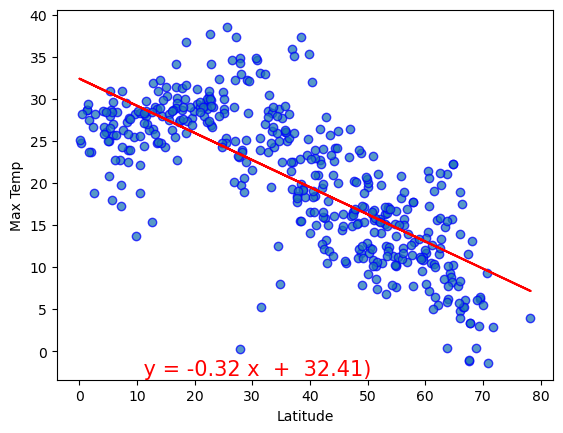

In [16]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Max Temp Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Max Temp")

The r-squared is: 0.769944713539787


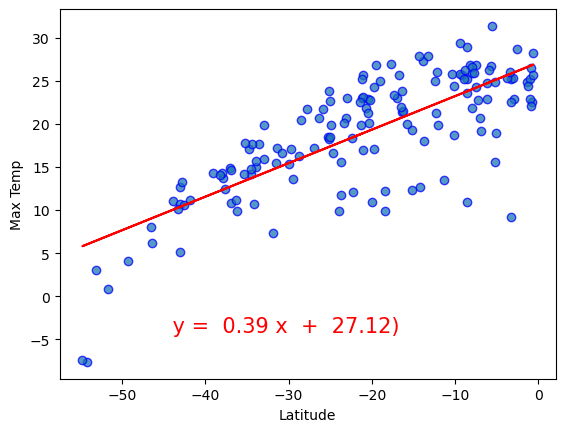

In [17]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Max Temp Vs.Latitude Linear Regression", xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:**

The regression tries to show if there is any relationship between the temperature and latitude.
From the models, the Southern Hemisphere shows a positive relationship between Temparature and Latitude, while the Northern Hemisphere shows a negative relationship between Temperature and Latitude. It can be concluded that it gets hotter as one goes upward on the southern hemisphere while it gets colder as one moves along the nothern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04135571830447357


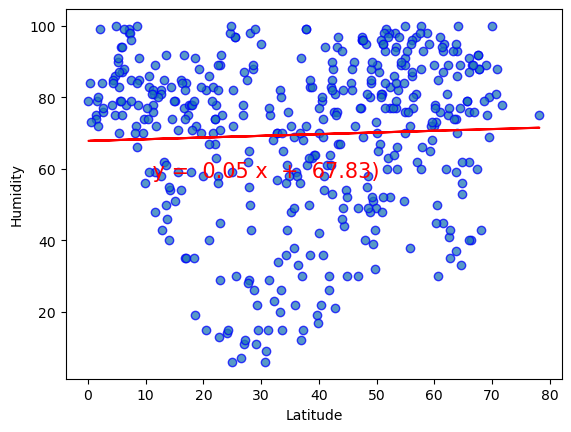

In [18]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Humidity Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Humidity")

The r-squared is: 0.06764504730990899


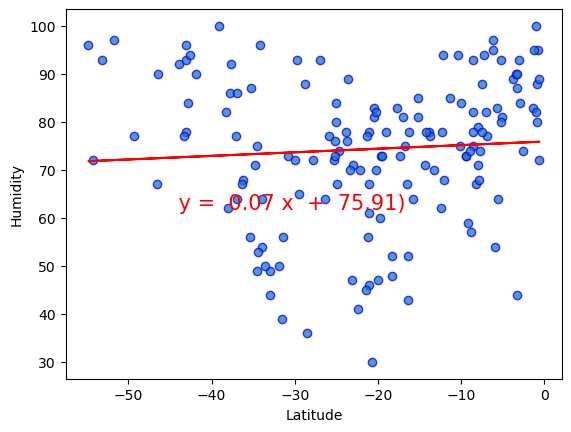

In [19]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Humidity Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** 

The models do not show any significant relationship between Humidity and Latitude. Latitude does not have a significant impact on the humidity in a region. The low r-squared values indicate that the model is not a good predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03113022472230649


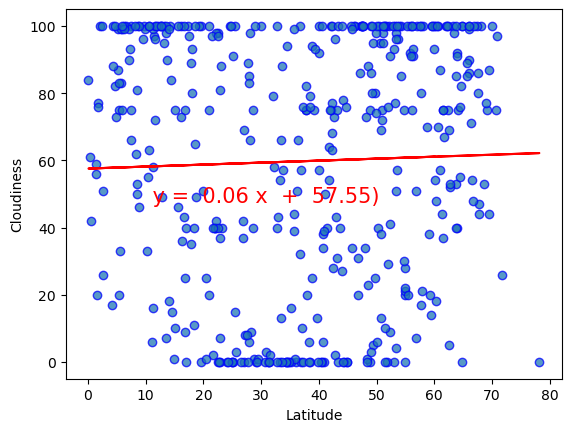

In [20]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Cloudiness Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

The r-squared is: -0.1438638378245179


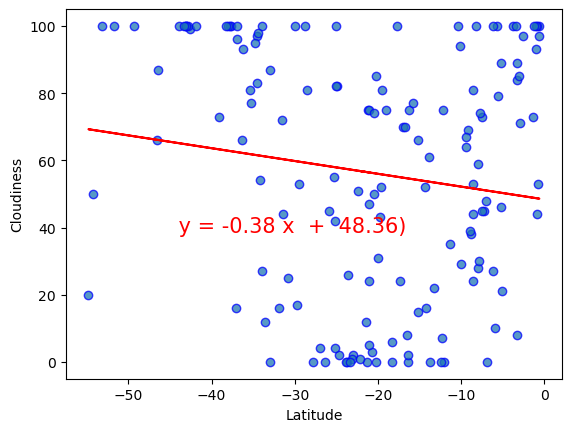

In [21]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Cloudiness Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:**

The models do not show any significant relationship between Cloudiness and Latitude. Latitude does not have a significant impact on the cloudiness in a region. The R-squared values shows that the linear model is a poor fit for the data. This indicates that there may be more factors that impact on the cloudiness in a region other than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.11564870196670726


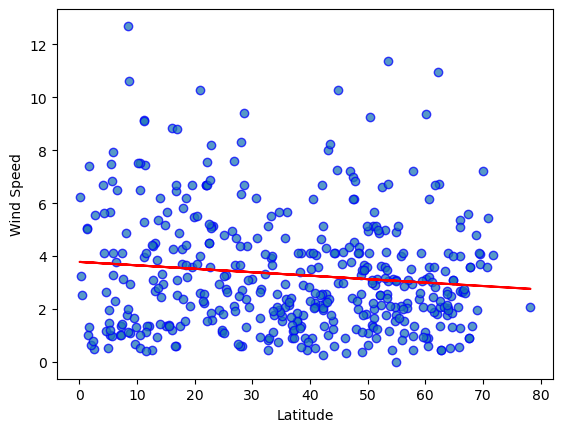

In [22]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Max Temp Latitude Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

The r-squared is: -0.21216192823066468


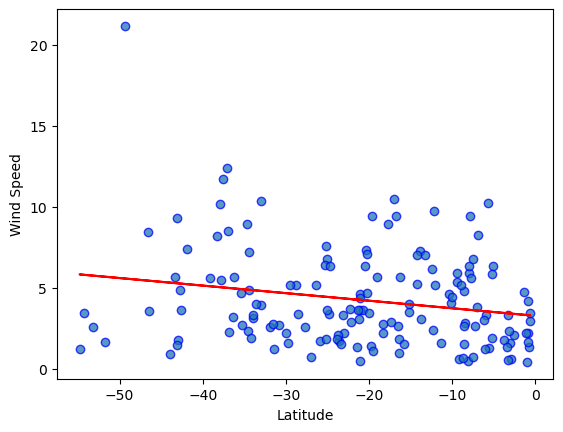

In [23]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Max Temp Vs.Latitude Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:**

The models do not show any significant relationship between Wind Speed and Latitude. Latitude does not have a significant impact on the wind speed in a region. The R-squared values shows that the linear model is a poor fit for the data. There could be other factors that may determine the wind speed in a region. The model shows outliers that the regression may not be able to predict accurately.